Evaluating Logistic Regression with Cross-Validation

In [1]:
import pandas as pd
data = pd.read_csv("/content/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [6]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Sex_male         0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [8]:
data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [9]:
data.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [10]:
X = data.drop(columns=['Survived'])
y = data['Survived']

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [14]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
single_split_accuracy = accuracy_score(y_test, y_pred)

In [18]:
k = 5
cv_scores = cross_val_score(model, X, y, cv=k)

In [19]:
print("Single Train-Test Split Accuracy: {:.2f}%".format(single_split_accuracy * 100))
print("K-Fold Cross-Validation Mean Accuracy: {:.2f}%".format(cv_scores.mean() * 100))
print("K-Fold Cross-Validation Standard Deviation: {:.2f}%".format(cv_scores.std() * 100))

Single Train-Test Split Accuracy: 81.01%
K-Fold Cross-Validation Mean Accuracy: 79.12%
K-Fold Cross-Validation Standard Deviation: 1.85%


Analyzing Overfitting and Underfitting in Decision Trees

In [53]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/titanic.csv')
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
X = data.drop(columns=['Survived'])
y = data['Survived']

In [48]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [50]:
train_accuracies = []
val_accuracies = []

In [51]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
depths = range(1, 21)
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    train_accuracies.append(model.score(X_train, y_train))
    val_accuracies.append(model.score(X_val, y_val))

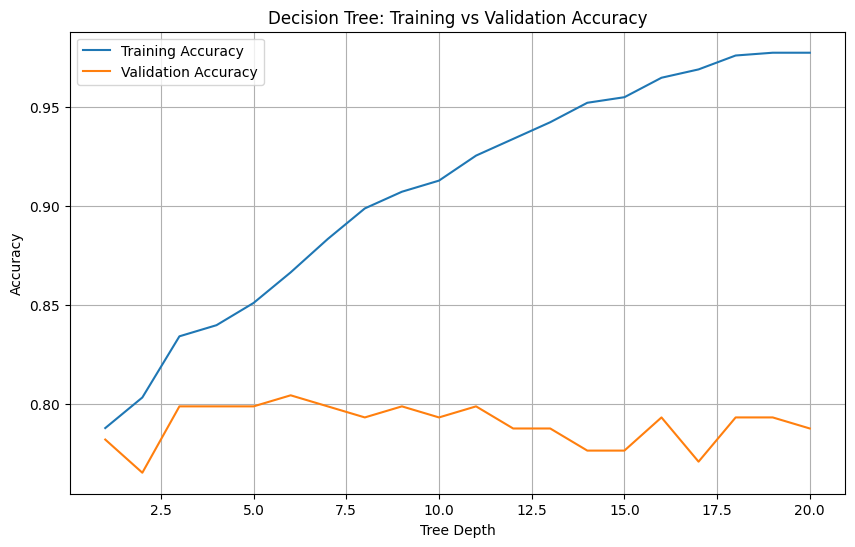

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy')
plt.plot(depths, val_accuracies, label='Validation Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Calculating Precision, Recall, and F1-Score for Logistic Regression

In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))

Accuracy: 81.01%
Precision: 0.79
Recall: 0.74
F1-Score: 0.76


ROC Curve Analysis for Decision Trees

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

In [57]:
y_prob = model.predict_proba(X_test)[:, 1]

In [58]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

In [59]:
auc = roc_auc_score(y_test, y_prob)

<Figure size 1000x600 with 0 Axes>

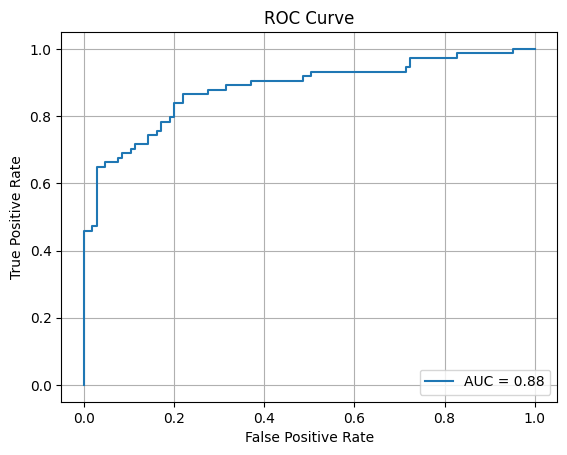

In [60]:
plt.figure(figsize=(10, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc).plot()
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

In [61]:
print("AUC: {:.2f}".format(auc))

AUC: 0.88


Comparing Model Performance with and without Cross-Validation

In [63]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
tree_clf = DecisionTreeClassifier(random_state=42)

In [64]:
log_reg.fit(X_train, y_train)
tree_clf.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
tree_clf_pred = tree_clf.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_precision = precision_score(y_test, log_reg_pred)
log_reg_recall = recall_score(y_test, log_reg_pred)
tree_clf_accuracy = accuracy_score(y_test, tree_clf_pred)
tree_clf_precision = precision_score(y_test, tree_clf_pred)
tree_clf_recall = recall_score(y_test, tree_clf_pred)

In [66]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
k = 5
log_reg_cv_pred = cross_val_predict(log_reg, X, y, cv=k)
tree_clf_cv_pred = cross_val_predict(tree_clf, X, y, cv=k)
log_reg_cv_accuracy = accuracy_score(y, log_reg_cv_pred)
log_reg_cv_precision = precision_score(y, log_reg_cv_pred)
log_reg_cv_recall = recall_score(y, log_reg_cv_pred)
tree_clf_cv_accuracy = accuracy_score(y, tree_clf_cv_pred)
tree_clf_cv_precision = precision_score(y, tree_clf_cv_pred)
tree_clf_cv_recall = recall_score(y, tree_clf_cv_pred)

In [67]:
print("Without Cross-Validation:")
print("Logistic Regression - Accuracy: {:.2f}%, Precision: {:.2f}, Recall: {:.2f}".format(log_reg_accuracy * 100, log_reg_precision, log_reg_recall))
print("Decision Tree - Accuracy: {:.2f}%, Precision: {:.2f}, Recall: {:.2f}".format(tree_clf_accuracy * 100, tree_clf_precision, tree_clf_recall))

print("\nWith 5-Fold Cross-Validation:")
print("Logistic Regression - Accuracy: {:.2f}%, Precision: {:.2f}, Recall: {:.2f}".format(log_reg_cv_accuracy * 100, log_reg_cv_precision, log_reg_cv_recall))
print("Decision Tree - Accuracy: {:.2f}%, Precision: {:.2f}, Recall: {:.2f}".format(tree_clf_cv_accuracy * 100, tree_clf_cv_precision, tree_clf_cv_recall))

Without Cross-Validation:
Logistic Regression - Accuracy: 81.01%, Precision: 0.79, Recall: 0.74
Decision Tree - Accuracy: 78.21%, Precision: 0.73, Recall: 0.76

With 5-Fold Cross-Validation:
Logistic Regression - Accuracy: 79.12%, Precision: 0.74, Recall: 0.70
Decision Tree - Accuracy: 78.11%, Precision: 0.72, Recall: 0.70
